In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\tsla_2019.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2387,2019-12-23,82.356003,84.402000,82.000000,83.844002,83.844002,66598000
2388,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2389,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2390,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500


In [4]:
df_d = df.reset_index()['Date']

In [5]:
df_d

0       2010-06-30
1       2010-07-01
2       2010-07-02
3       2010-07-06
4       2010-07-07
           ...    
2387    2019-12-23
2388    2019-12-24
2389    2019-12-26
2390    2019-12-27
2391    2019-12-30
Name: Date, Length: 2392, dtype: object

In [6]:
df_h = df.reset_index()['Low']
df_h

0        4.660000
1        4.054000
2        3.742000
3        3.166000
4        2.996000
          ...    
2387    82.000000
2388    82.538002
2389    85.269997
2390    85.222000
2391    81.851997
Name: Low, Length: 2392, dtype: float64

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2387,2019-12-23,82.356003,84.402000,82.000000,83.844002,83.844002,66598000
2388,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2389,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2390,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2391,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


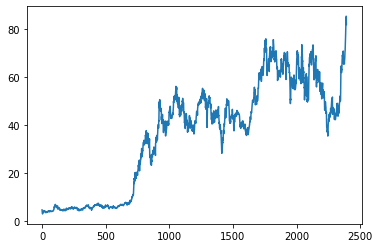

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))
df_h.shape

(2392, 1)

In [12]:
df_h

array([[0.0202251 ],
       [0.01285947],
       [0.00906726],
       ...,
       [1.        ],
       [0.99941662],
       [0.95845589]])

In [13]:
trng_size = int(len(df_h) * 0.8)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size: len(df_h), :1]

In [14]:
len(train_data)

1913

In [15]:
import numpy 
def create_dataset(dataset, time_step = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train)

[[0.0202251  0.01285947 0.00906726 ... 0.03267132 0.03313319 0.03388677]
 [0.01285947 0.00906726 0.00206627 ... 0.03313319 0.03388677 0.03578287]
 [0.00906726 0.00206627 0.         ... 0.03388677 0.03578287 0.0401585 ]
 ...
 [0.79388383 0.79847831 0.79568274 ... 0.78134042 0.77966308 0.7859105 ]
 [0.79847831 0.79568274 0.81440069 ... 0.77966308 0.7859105  0.79536671]
 [0.79568274 0.81440069 0.83968209 ... 0.7859105  0.79536671 0.80270808]]


In [18]:
print(x_train.shape), print(y_train.shape)

(1812, 100)
(1812,)


(None, None)

In [19]:
print(x_test.shape), print(y_test.shape)

(378, 100)
(378,)


(None, None)

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
model = Sequential()
model.add(LSTM(70, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(90, return_sequences = True))
model.add(LSTM(110))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
lstm_2 (LSTM)                (None, 110)               88440     
_________________________________________________________________
dense (Dense)                (None, 1)                 111       
Total params: 166,671
Trainable params: 166,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 125, batch_size = 64, verbose = 1)

Epoch 1/125
29/29 [==============================] - 26s 903ms/step - loss: 0.0232 - val_loss: 0.0046
Epoch 2/125
29/29 [==============================] - 17s 593ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 3/125
29/29 [==============================] - 16s 566ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 4/125
29/29 [==============================] - 16s 556ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 5/125
29/29 [==============================] - 17s 570ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 6/125
29/29 [==============================] - 16s 554ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 7/125
29/29 [==============================] - 16s 543ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 8/125
29/29 [==============================] - 16s 561ms/step - loss: 9.8051e-04 - val_loss: 0.0035
Epoch 9/125
29/29 [==============================] - 17s 579ms/step - loss: 9.6299e-04 - val_loss: 0.0032
Epoch 10/125
29/29 [==============================] - 16s 566ms/step - los

In [25]:
import tensorflow as tf

In [26]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [27]:
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

37.94647729120569

In [29]:
math.sqrt(mean_squared_error(y_test, predict_test))

56.54534886764874

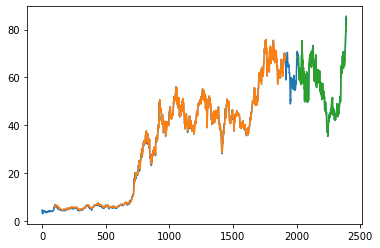

In [30]:
# Shifts train predictions for Plotting 
import numpy
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

479

In [32]:
test_input = test_data[379:].reshape(1, -1)
test_input.shape

(1, 100)

In [33]:
temp_input = list(test_input)
temp_input = temp_input[0].tolist()
temp_input

[0.529134363072211,
 0.5319542333648868,
 0.5196538585575221,
 0.5167367521964441,
 0.49033719608882004,
 0.47784236129915986,
 0.488708467634069,
 0.5025160015016652,
 0.5094197745127174,
 0.4925493044904576,
 0.49405647570519756,
 0.476505365358632,
 0.47781802797304224,
 0.4790091576564585,
 0.479689858753307,
 0.49352164086546074,
 0.5086175526393837,
 0.5060651179983391,
 0.4964630440891306,
 0.500449710739105,
 0.5109512304355408,
 0.5208207035328549,
 0.5201157055734145,
 0.5372779081098977,
 0.5576974824743228,
 0.5588399819690295,
 0.5498456699508594,
 0.547900948582819,
 0.5527627276939031,
 0.5587670549177282,
 0.5425286436490984,
 0.5451054237707693,
 0.5047281099033027,
 0.4943968019446046,
 0.5163721412489537,
 0.5439142333148101,
 0.5375452951434947,
 0.5448866183078476,
 0.5456159131298799,
 0.5087877157590872,
 0.5180008210856706,
 0.5191676660610034,
 0.5336315676993302,
 0.5485816010616331,
 0.5508423518064887,
 0.5635559434410364,
 0.564333819833744,
 0.581325847096

In [34]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        test_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,test_input))
        test_input=test_input.reshape(1, -1)
        test_input=test_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(test_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        test_input = test_input.reshape((1, n_steps,1))
        yhat = model.predict(test_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)

[0.92901736]
101
1 day input [0.53195423 0.51965386 0.51673675 0.4903372  0.47784236 0.48870847
 0.502516   0.50941977 0.4925493  0.49405648 0.47650537 0.47781803
 0.47900916 0.47968986 0.49352164 0.50861755 0.50606512 0.49646304
 0.50044971 0.51095123 0.5208207  0.52011571 0.53727791 0.55769748
 0.55883998 0.54984567 0.54790095 0.55276273 0.55876705 0.54252864
 0.54510542 0.50472811 0.4943968  0.51637214 0.54391423 0.5375453
 0.54488662 0.54561591 0.50878772 0.51800082 0.51916767 0.53363157
 0.5485816  0.55084235 0.56355594 0.56433382 0.58132585 0.58813235
 0.59603279 0.58370812 0.57174807 0.57337676 0.57459224 0.66660187
 0.6833994  0.74779395 0.72871142 0.71709168 0.7244573  0.71667843
 0.71536577 0.73204173 0.7281037  0.76096942 0.77185991 0.7949535
 0.7999125  0.80268378 0.79716561 0.81041398 0.80492019 0.80905268
 0.81335542 0.82412433 0.76578266 0.77662445 0.75873302 0.76230643
 0.7597054  0.76259816 0.77110638 0.77271073 0.75909764 0.77737808
 0.77813163 0.78841435 0.8170504  0

In [35]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131)

In [36]:
import matplotlib.pyplot as plt

In [37]:
len(df_h)

2392

In [41]:
plt.plot(train_day,scaler.inverse_transform(df_h[2392:]))
plt.plot(test_day,scaler.inverse_transform(output_lst))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

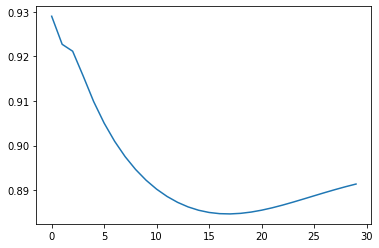

In [38]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[2392:])

In [39]:
df_final = scaler.inverse_transform(df_final).tolist()

In [40]:
df_final[2392:]

[[79.4299718992129],
 [78.9118784617169],
 [78.7842982776177],
 [78.32815106112189],
 [77.85510986652714],
 [77.45712305068541],
 [77.12139630623525],
 [76.83804824976033],
 [76.6005713895517],
 [76.40231602044183],
 [76.23770639407122],
 [76.10271639838786],
 [75.99432522337462],
 [75.91029668499286],
 [75.84868883394587],
 [75.80776568525631],
 [75.78578144612206],
 [75.7809510924421],
 [75.7913522905692],
 [75.81493520513457],
 [75.84959605773348],
 [75.89313299171383],
 [75.9434618443203],
 [75.99847883714814],
 [76.05626654046245],
 [76.11504973798692],
 [76.1732395621152],
 [76.22960022693115],
 [76.28300873650313],
 [76.33264613746607]]